<a href="https://colab.research.google.com/github/alixa2003/Arch-Internship-Tasks/blob/main/Arch_Internship_Task02(Month_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IRIS CLASSIFICATION**

**Importing Libraries**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [ ]:
# load dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Exploring Dataset**

In [ ]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# dataset statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# check for missing values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

np.int64(1)

In [ ]:
# handle duplicate values
df.drop_duplicates(inplace=True)

**Exploratory Data Analysis**

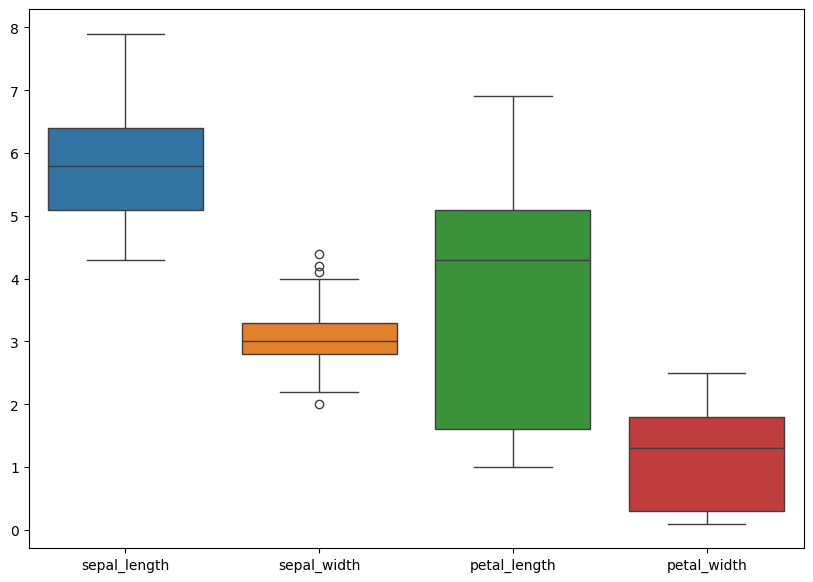

In [ ]:
# check outliers
plt.figure(figsize=(10,7))
sns.boxplot(data=df)
plt.show()

In [ ]:
# Handle outliers if any (removing outliers using IQR method)
Q1 = np.percentile(df.select_dtypes(include=[np.number]), 25, axis=0)
Q3 = np.percentile(df.select_dtypes(include=[np.number]), 75, axis=0)
IQR = Q3 - Q1
data = df[~((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
print('Data Shape:', data.shape)

Data Shape: (145, 5)


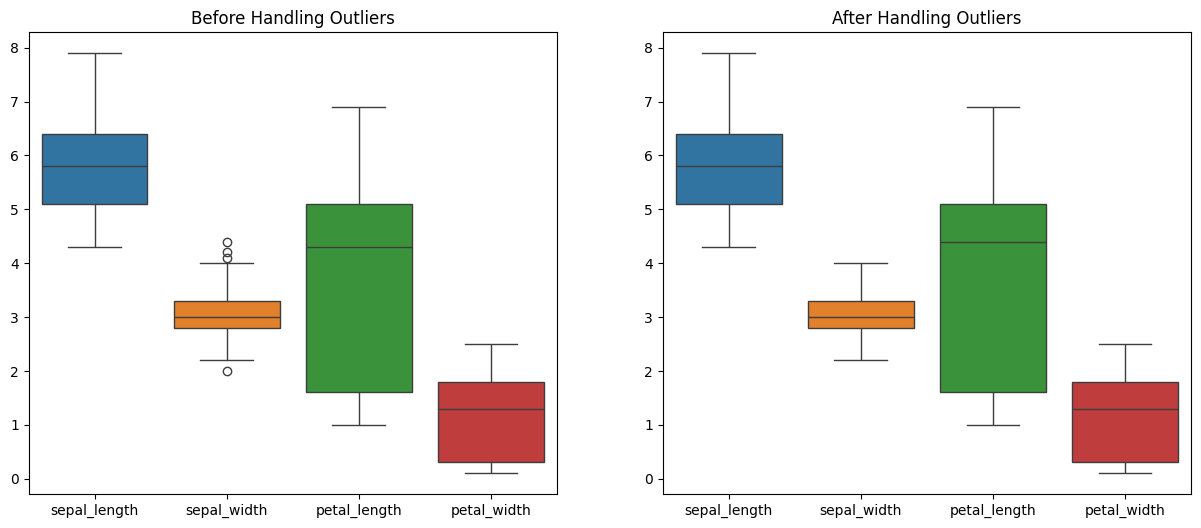

In [ ]:
# showing side by side comparison of outliers before and after handling
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title('Before Handling Outliers')
sns.boxplot(data=data, ax=axes[1])
axes[1].set_title('After Handling Outliers')
plt.show()

<Figure size 800x700 with 0 Axes>

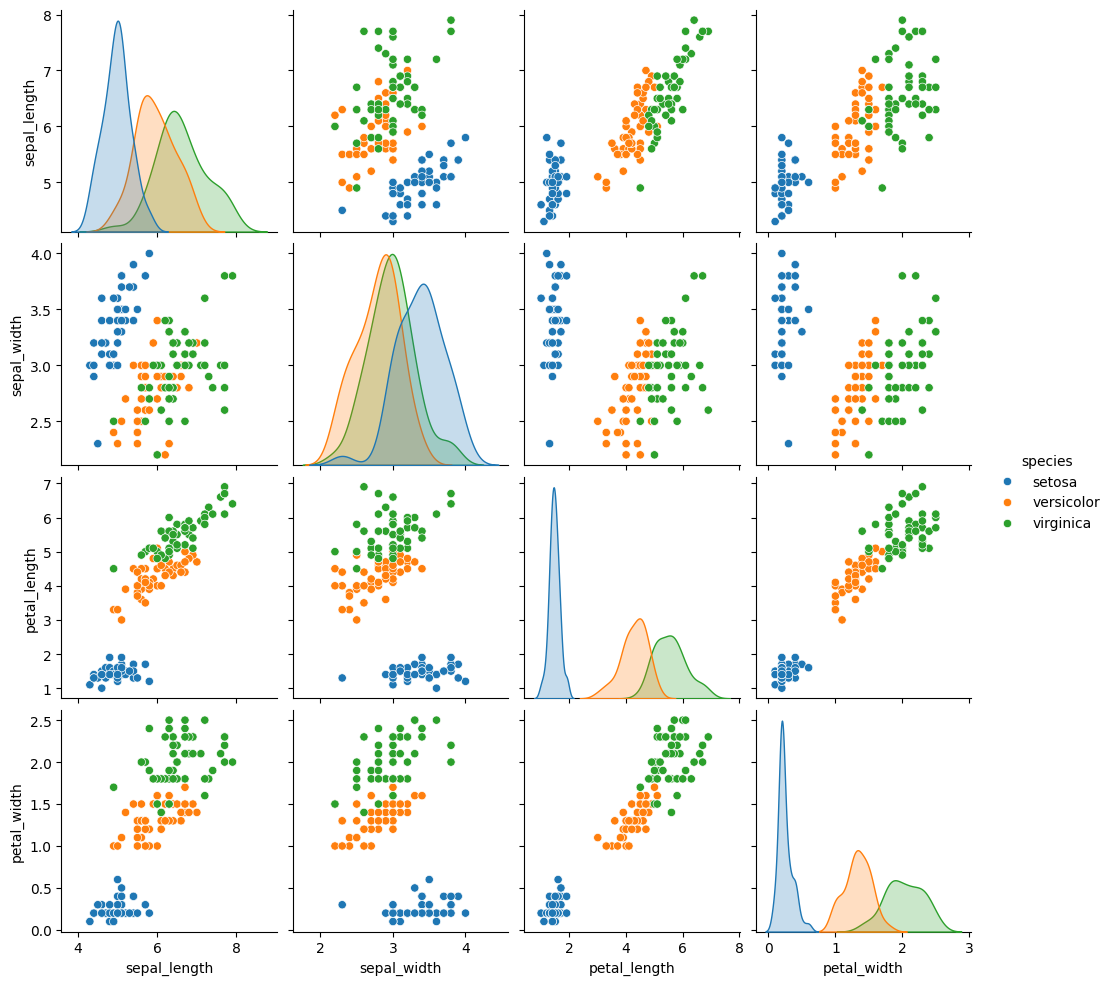

In [ ]:
# check relationships of target variable with other features
plt.figure(figsize=(8,7))
sns.pairplot(data, hue='species')
plt.show()

In [ ]:
# check how many classes are there in target variable
data['species'].value_counts()


,count
species,
versicolor,49
virginica,49
setosa,47


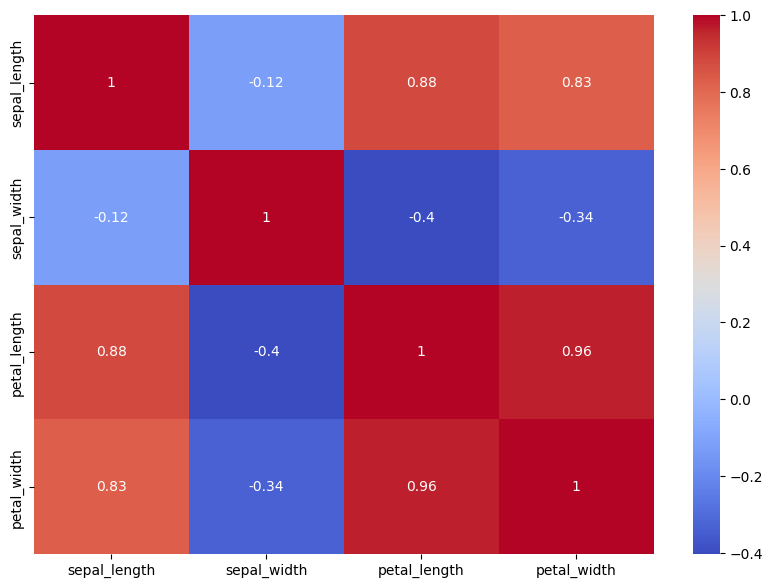

In [ ]:
# checking correlation between numerical features
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

**Splitting Dataset**

In [ ]:
# split features and target variable
X = data.drop('species', axis=1)
y = data['species']

In [ ]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (29, 4), (116,), (29,))

**Scaling Features**

In [ ]:
# scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**One-Hot Encoding**

In [ ]:
# label encoding of target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

**Training Different Models**

In [ ]:
#train model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# make predictions
y_pred = model.predict(X_test)

In [ ]:
# evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9310344827586207
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        29
   macro avg       0.95      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29

Confusion Matrix:
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]


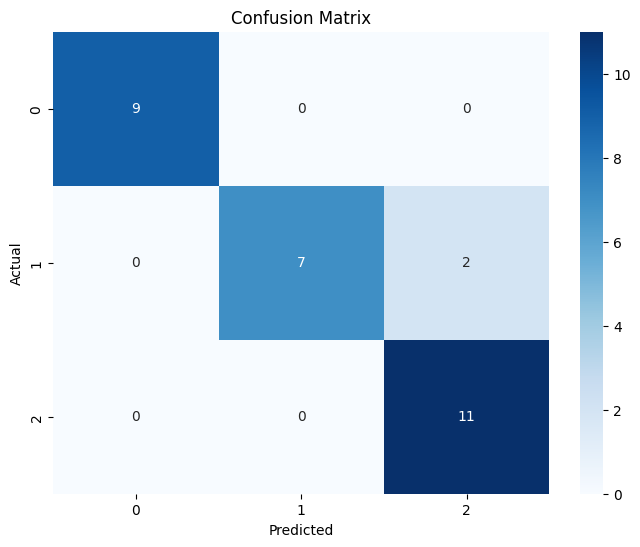

In [ ]:
# visualize the results
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# checking other models (Decision Tree Classifier)
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# making predictions with Decision Tree
y_dt_pred = dt_model.predict(X_test)

In [ ]:
# evaluate model of decision tree
print('Decision Tree Accuracy:', accuracy_score(y_test, y_dt_pred))
print('Decision Tree Classification Report:\n', classification_report(y_test, y_dt_pred))
print('Decision Tree Confusion Matrix:\n', confusion_matrix(y_test, y_dt_pred))

Decision Tree Accuracy: 0.9310344827586207
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        29
   macro avg       0.95      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29

Decision Tree Confusion Matrix:
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]


In [ ]:
# check another model (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
# fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# make predictions
y_rf_pred = rf_model.predict(X_test)

In [ ]:
# evaluate model random forest
print('Random Forest Accuracy:', accuracy_score(y_test, y_rf_pred))
print('Random Forest Classification Report:\n', classification_report(y_test, y_rf_pred))
print('Random Forest Confusion Matrix:\n', confusion_matrix(y_test, y_rf_pred))

Random Forest Accuracy: 0.9310344827586207
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        29
   macro avg       0.95      0.93      0.93        29
weighted avg       0.94      0.93      0.93        29

Random Forest Confusion Matrix:
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]


In [ ]:
# check other models as needed for better performance
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
svc_model = SVC()


In [ ]:
# fit the model
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
# make predictions
y_svc_pred = svc_model.predict(X_test)

In [ ]:
# evaluate model
print('SVC Accuracy:', accuracy_score(y_test, y_svc_pred))
print('SVC Classification Report:\n', classification_report(y_test, y_svc_pred))
print('SVC Confusion Matrix:\n', confusion_matrix(y_test, y_svc_pred))

SVC Accuracy: 0.9655172413793104
SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.97        29
weighted avg       0.97      0.97      0.97        29

SVC Confusion Matrix:
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [ ]:
# check results on knn model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# make predictions
y_knn_pred = knn_model.predict(X_test)

In [ ]:
# evaluate knn
print('KNN Accuracy:', accuracy_score(y_test, y_knn_pred))
print('KNN Classification Report:\n', classification_report(y_test, y_knn_pred))
print('KNN Confusion Matrix:\n', confusion_matrix(y_test, y_knn_pred))

KNN Accuracy: 0.9655172413793104
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.97        29
weighted avg       0.97      0.97      0.97        29

KNN Confusion Matrix:
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


**Choosing The Best Model**

In [ ]:
# choosing the best model based on accuracy and other metrics
print("All model evaluations complete. Choose the best model based on accuracy and other metrics.")
best_model = max(
    {
        'Logistic Regression': accuracy_score(y_test, y_pred),
        'Decision Tree': accuracy_score(y_test, y_dt_pred),
        'Random Forest': accuracy_score(y_test, y_rf_pred),
        'SVC': accuracy_score(y_test, y_svc_pred),
        'KNN': accuracy_score(y_test, y_knn_pred)
    })
print('The best model is:', best_model)

All model evaluations complete. Choose the best model based on accuracy and other metrics.
The best model is: SVC


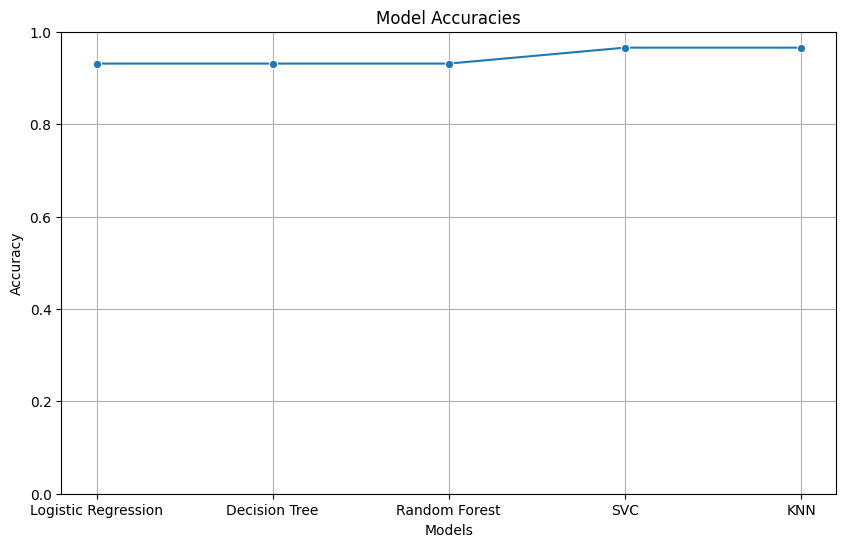

In [ ]:
# visualize which model performed best with different colors using line plot
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_dt_pred),
    accuracy_score(y_test, y_rf_pred),
    accuracy_score(y_test, y_svc_pred),
    accuracy_score(y_test, y_knn_pred)
]
plt.figure(figsize=(10,6))
sns.lineplot(x=models, y=accuracies, marker='o')
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

**Cross-Validation of All Models**

In [ ]:
# cross-validation of all models used till now
from sklearn.model_selection import cross_val_score
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVC', SVC()),
    ('KNN', KNeighborsClassifier())
]
for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=3)
    print(f'{name} Cross-Validation Scores: {cv_scores}')
    print(f'{name} Cross-Validation Mean Score: {np.mean(cv_scores)}\n')



Logistic Regression Cross-Validation Scores: [1.         0.94871795 0.92105263]
Logistic Regression Cross-Validation Mean Score: 0.9565901934322986

Decision Tree Cross-Validation Scores: [0.97435897 0.84615385 0.92105263]
Decision Tree Cross-Validation Mean Score: 0.913855150697256

Random Forest Cross-Validation Scores: [1.         0.94871795 0.92105263]
Random Forest Cross-Validation Mean Score: 0.9565901934322986

SVC Cross-Validation Scores: [0.97435897 0.94871795 0.92105263]
SVC Cross-Validation Mean Score: 0.94804318488529

KNN Cross-Validation Scores: [0.97435897 0.94871795 0.94736842]
KNN Cross-Validation Mean Score: 0.9568151147098515



In [ ]:
# choosing best model after cross-validation
best_model = max(
    {
        'Logistic Regression': np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=3)),
        'Decision Tree': np.mean(cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=3)),
        'Random Forest': np.mean(cross_val_score(RandomForestClassifier(), X_train, y_train, cv=3)),
        'SVC': np.mean(cross_val_score(SVC(), X_train, y_train, cv=3)),
        'KNN': np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=3))
    })
print('The best model is:', best_model)


The best model is: SVC
